In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
dataset = pd.read_csv('H-1B_Disclosure_Data_FY2019.csv')

C:\ananconda\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (4,13,14,20,22,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,2016-04-08 00:00:00,2019-04-30 00:00:00,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,2017-07-14 00:00:00,2019-05-13 00:00:00,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,2017-08-23 00:00:00,2019-04-30 00:00:00,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,2017-12-22 00:00:00,2019-08-20 00:00:00,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,2018-01-10 00:00:00,2019-04-15 00:00:00,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(664616, 260)

In [9]:
dataset = dataset[['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']]

In [10]:
dataset.CASE_STATUS.unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [11]:
dataset = dataset[((dataset['CASE_STATUS'].str.upper() == 'CERTIFIED') | \
                               (dataset['CASE_STATUS'].str.upper() == 'DENIED')) & \
                              (dataset['VISA_CLASS'].str.upper() == 'H-1B')]  

In [12]:
dataset.CASE_STATUS.unique()

array(['CERTIFIED', 'DENIED'], dtype=object)

<AxesSubplot:>

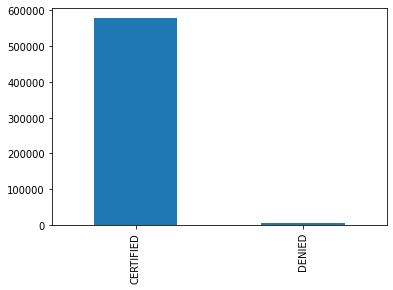

In [13]:
dataset.CASE_STATUS.value_counts().plot(kind = 'bar')

In [16]:
dataset.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       4
AGENT_REPRESENTING_EMPLOYER         5
SECONDARY_ENTITY_1              49761
JOB_TITLE                           0
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     20
SUPPORT_H1B                    365278
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4681
dtype: int64

In [14]:
emp_name = dataset['EMPLOYER_NAME'].value_counts()
emp_name.to_frame()

,EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,28106
INFOSYS LIMITED,21402
TATA CONSULTANCY SERVICES LIMITED,11839
GOOGLE LLC,9093
ERNST & YOUNG U.S. LLP,8661
...,...
"PYRAMID CONSULTING GROUP, INC.",1
HEALTH CARE LOGISTICS INC.,1
INTELLISPAR LLC,1
ELAN RGV WIRELESS LLC,1


<AxesSubplot:xlabel='EMPLOYER_NAME'>

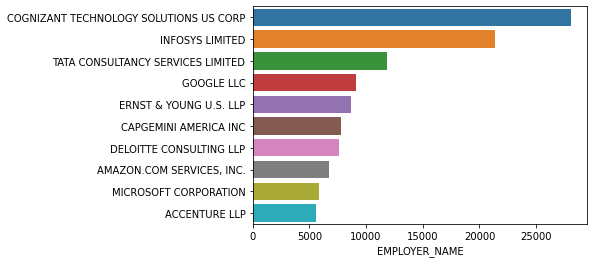

In [20]:
dataset['EMPLOYER_NAME'].value_counts()
sns.barplot(x = dataset['EMPLOYER_NAME'].value_counts()[:10], y = dataset['EMPLOYER_NAME'].value_counts().index[:10])

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WILLFUL_VIOLATOR', ylabel='count'>

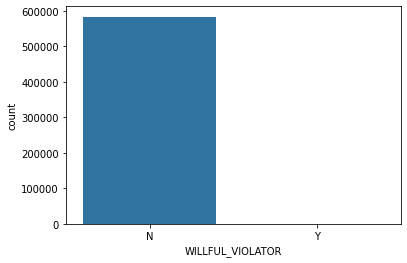

In [22]:
sns.countplot(dataset.WILLFUL_VIOLATOR)

In [23]:
dataset.AGENT_REPRESENTING_EMPLOYER.unique()

array(['Y', 'N', nan], dtype=object)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGENT_REPRESENTING_EMPLOYER', ylabel='count'>

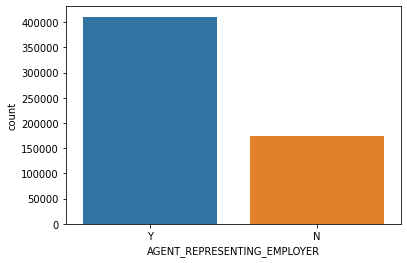

In [24]:
sns.countplot(dataset.AGENT_REPRESENTING_EMPLOYER)

In [25]:
dataset.JOB_TITLE.unique()

array(['ADVERSTING AND PROMOTIONS MANAGER',
       'ADVERTISING AND PROMOTIONS DIRECTOR', 'PROGRAM MANAGER I', ...,
       'INSPECTOR V', 'CONTAINER MOBILE HARBOR CRANE OPERATOR',
       'DIGITAL TOUCHPOINTS ANALYST'], dtype=object)

In [ ]:
sns.barplot(x = dataset['JOB_TITLE'].value_counts()[:10], y = dataset['JOB_TITLE'].value_counts().index[:10])